In [27]:
import pandas as pd
import os,sys
import numpy as np
from sympy.solvers import solve
from sympy import Symbol
import matplotlib.pyplot as plt
import datetime
import sympy as sym

def eq_builder(a: np.array, var='s'):
    length = len(a)
    eq = ''
    for i, coef in enumerate(a):
#         print(i, coef)
        if i != 0 and str(coef)[0] != '-':
            eq += '+'
        if i != length-1:
            eq += str(coef) + '*{}**{}'.format(var, str(length-i-1))
            
        else:
            eq += str(coef)
        
    return eq

In [16]:
# dirname = '/Users/sangchoi/Downloads/intraday-market-data/'
# dir_etf = 'ETFs/'
# filename = 'iwm.us.txt'
# filename = 'TOS Kaggle data week ending 2020 03 21.csv'

# intraday dataset for popular ETFs
df = pd.read_csv('dataset.csv')
# The fastest falling date, 2020-03-16
df_filtered = df[np.logical_and(df.TimeStamp > '2020-03-16 11:00:00.0', df.TimeStamp < '2020-03-16 16:00:00.0')].reset_index()

In [29]:
print('reprocesing timestamp')
# convert timestamp to seconds
convert_to_datetime = lambda x: datetime.datetime.strptime(x, "%Y-%m-%d %H:%M:%S.%f")

x = df_filtered.TimeStamp
y = df_filtered.SPY

x = x.apply(convert_to_datetime)
start = x[0]
normalize = lambda x: int((x - start).total_seconds())

x[0] = 0
x[1:] = x[1:].apply(normalize)
x = x.astype(float)
y = y.astype(float)


s = Symbol('x')

# possible inflection coordinates
x_inf = list()
y_inf = list()

prev = None

reprocesing timestamp


starting analyzing...


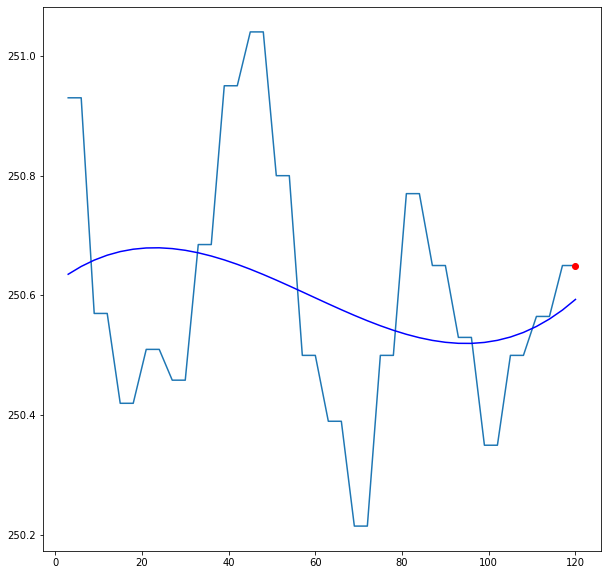

concavity change detected.


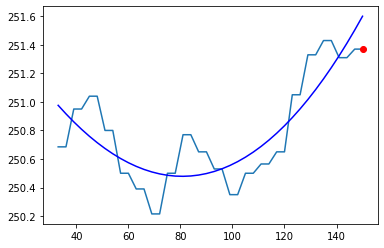

concavity change detected.


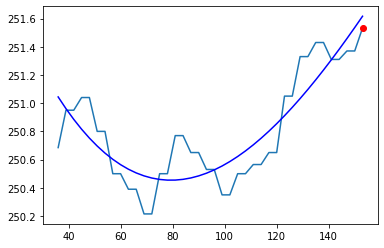

concavity change detected.


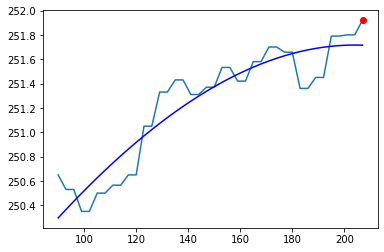

concavity change detected.


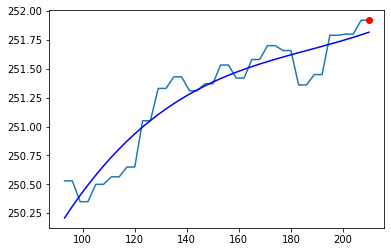

concavity change detected.


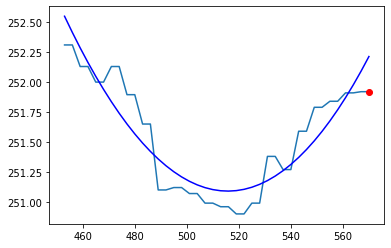

concavity change detected.


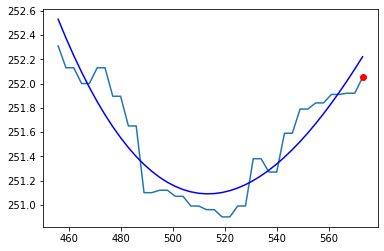

concavity change detected.


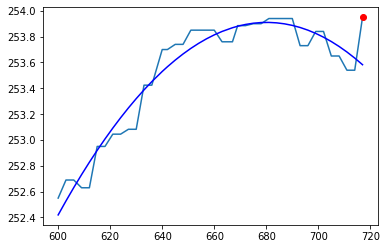

concavity change detected.


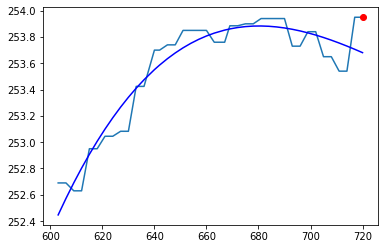

concavity change detected.


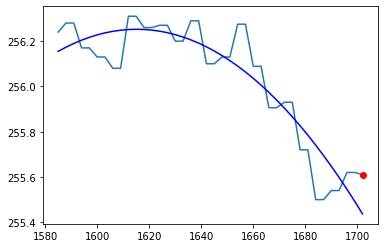

concavity change detected.


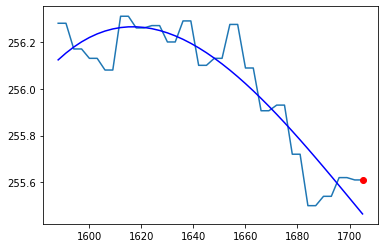

concavity change detected.


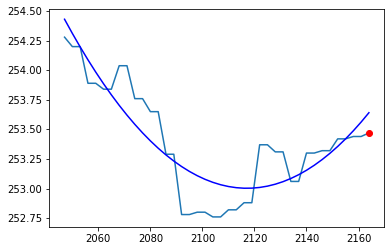

concavity change detected.


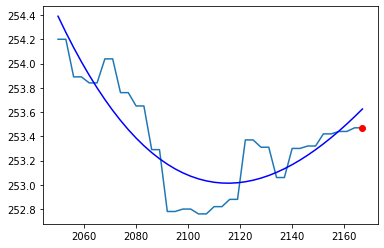

concavity change detected.


In [ ]:
print('starting analyzing...')

# possible inflection coordinates
x_inf = list()
y_inf = list()

prev = None
window = 20 * 2 # 5 minutes moving window
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111)

# fig.show()
# fig.canvas.draw()

for i in range(len(x) - window):
    x_new = x[i:i+window]
    y_new = y[i:i+window]

    z = np.polyfit(x_new, y_new, 3)
    d = sym.diff(sym.diff(eq_builder(z, 'x'), s), s)
#     print(i, solve(d, s))
    result = solve(d,s)
    if len(result) == 1:
        v = solve(d,s)[0]
        if prev != None:
            if (prev >= 0 and v < 0) or (v >= 0 and prev < 0):
                x_inf += [list(x_new)[-1]]
                y_inf += [list(y_new)[-1]]

                f = np.poly1d(z) 
                y_fit = f(x_new)
                
                plt.plot(x_new, y_new, '-', x_inf[-1], y_inf[-1], 'ro', x_new, y_fit, 'b-')
                plt.show()

                print('concavity change detected.')
        prev = v
    else:
        print('unsolvable?', result)
        
print(x_inf)
print(y_inf)

In [ ]:
plt.figure(figsize=(30, 30))

plt.plot(x, y, '-', x_inf, y_inf, 'ro')
plt.show()